<a href="https://colab.research.google.com/github/hpbowala/ComputerVisionAssignment/blob/main/249290X_ComputerVisionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [103]:
#connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
base_path = '/content/drive/MyDrive/ComputerVissionAssignment/a1images/'

### Question 1

In [105]:
#read image from the folder
q1b_image_path = base_path + 'emma.jpg'
q1b_image = cv.imread( q1b_image_path, cv.IMREAD_GRAYSCALE)
assert q1b_image is not None
#display image
#cv2_imshow(q1b_image)


In [106]:
c = np.array([(50, 50), (51, 100), (150,100),(151,255)])

t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
#51, 100, num = 100 - 50
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, c[2,1], c[2,0]-c[1,0]).astype('uint8')  # 52 → 150
t4 = np.linspace(c[2,0]+1, 255, 255-c[2,0]).astype('uint8')

In [107]:
print(0, c[0,1], c[0,0]+1-0)
print(c[0,1]+1, c[1,1], c[1,0]-c[0,0])
print(c[1,0]+1, c[2,1], c[2,0]-c[1,0])
print(c[2,0]+1, c[3,1], 255-c[2,0])

0 50 51
51 100 1
52 100 99
151 255 105


In [108]:
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
image_transformed = cv.LUT(q1b_image, transform)


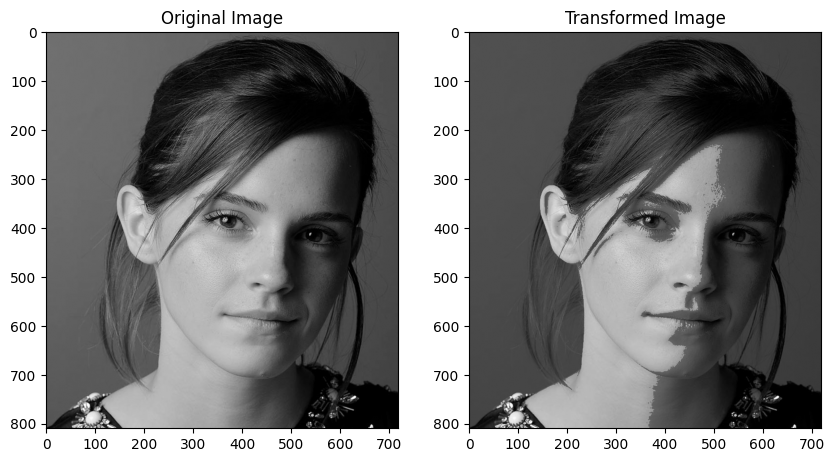

In [109]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(q1b_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

### Question 2

In [110]:
q2_img_path = base_path + "brain_proton_density_slice.png";
q2_img = cv.imread(q2_img_path, cv.IMREAD_GRAYSCALE)
assert q2_img is not None

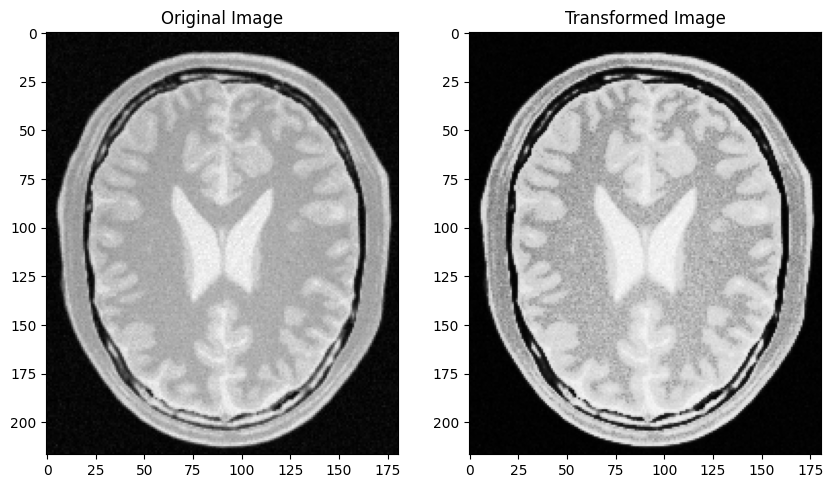

In [111]:
#accentuate gray matter and white matter

cntrlpt2 = np.array([(100, 40), (180, 200), (255, 255)])

q2t1 = np.linspace(0, cntrlpt2[0,1], cntrlpt2[0,0]-0 + 1).astype('uint8')
q2t2 = np.linspace(cntrlpt2[0,1]+1, cntrlpt2[1,1], cntrlpt2[1,0]-cntrlpt2[0,0]).astype('uint8')
q2t3 = np.linspace(cntrlpt2[1,1]+1, cntrlpt2[2,1], cntrlpt2[2,0]-cntrlpt2[1,0]).astype('uint8')

q2_transform = np.concatenate((q2t1, q2t2), axis=0).astype('uint8')
q2_transform = np.concatenate((q2_transform, q2t3), axis=0).astype('uint8')
q2_transformed = cv.LUT(q2_img, q2_transform)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(q2_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(q2_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()


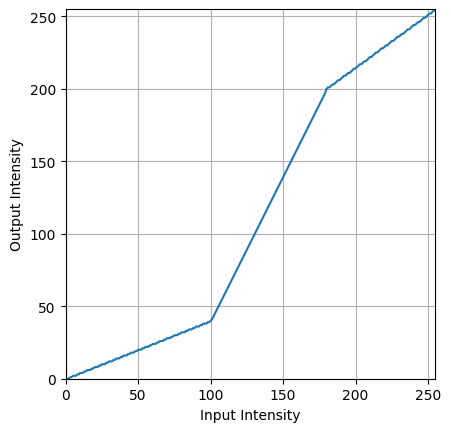

In [112]:
#plot graph
fig, ax = plt.subplots()
ax.plot(q2_transform)
ax.set_xlabel(r'Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.grid(True)
plt.show()

256


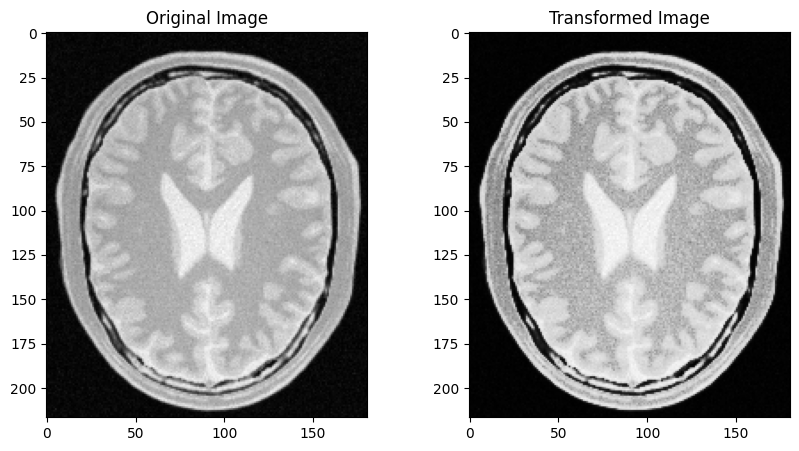

In [113]:
cntrlpt2 = np.array([(0, 0), (100, 40), (180, 200), (255, 255)])

q2_t1 = np.linspace(cntrlpt2[0, 1], cntrlpt2[1, 1], cntrlpt2[1, 0] - cntrlpt2[0, 0] + 1, endpoint=True).astype('uint8')
q2_t2 = np.linspace(cntrlpt2[1, 1], cntrlpt2[2, 1], cntrlpt2[2, 0] - cntrlpt2[1, 0] + 1, endpoint=True).astype('uint8')
q2_t3 = np.linspace(cntrlpt2[2, 1], cntrlpt2[3, 1], cntrlpt2[3, 0] - cntrlpt2[2, 0] + 1, endpoint=True).astype('uint8')


q2_transform = np.concatenate((q2_t1[:-1], q2_t2[:-1], q2_t3), axis=0).astype('uint8')

print(len(q2_transform))

q2_transformed = cv.LUT(q2_img, q2_transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(q2_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(q2_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()


## Question 3 - Gamma Correction

In [161]:
q3_img_path = base_path + "highlights_and_shadows.jpg";
q3_img = cv.imread(q3_img_path, cv.IMREAD_COLOR)

assert q3_img is not None

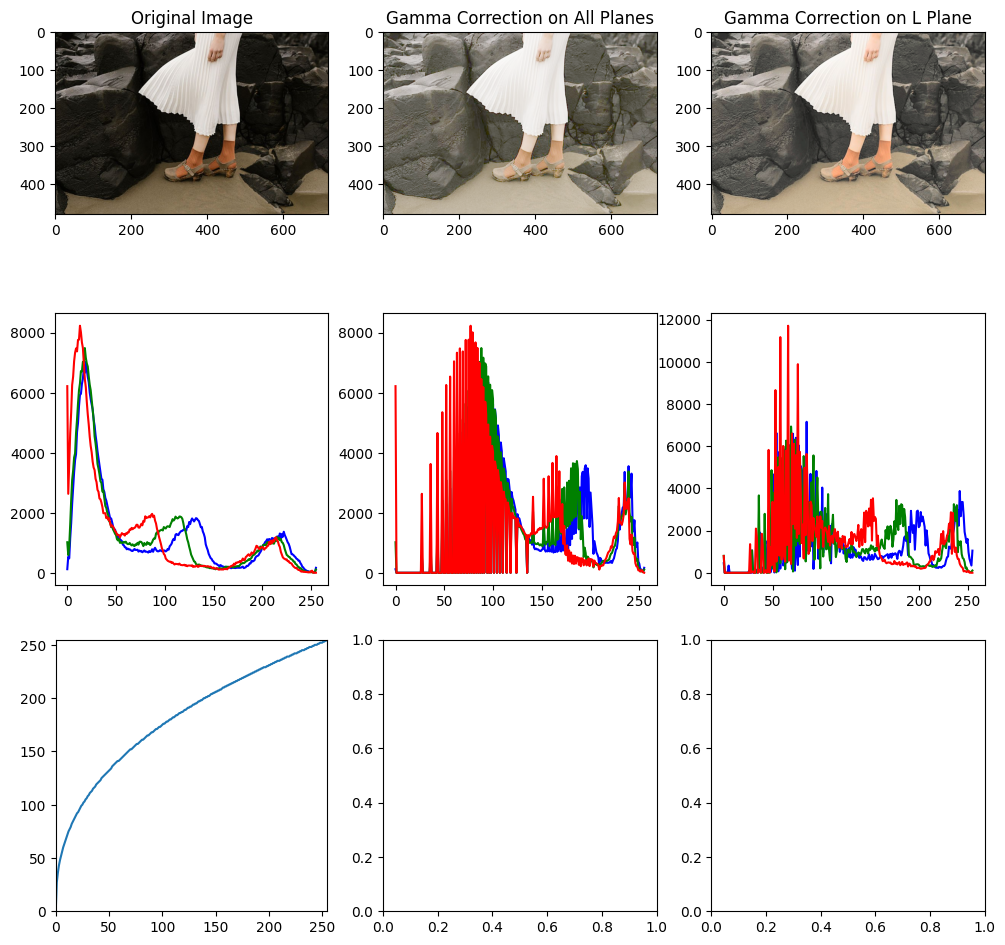

In [173]:
gamma = 2.5
table = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

#convert bgr imread to rgb
q3_img_rgb = cv.cvtColor(q3_img, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(q3_img, cv.COLOR_BGR2RGB)
l_gamma = cv.cvtColor(q3_img, cv.COLOR_BGR2LAB)

#transform gamma in all 3 planes in LAB color space
img_gamma = cv.LUT(img_gamma, table)

#gamma correction in L plane only
L, a, b = cv.split(l_gamma)
l_gamma = cv.LUT(L, table)
l_gamma = cv.merge((l_gamma, a, b))
l_gamma = cv.cvtColor(l_gamma, cv.COLOR_LAB2BGR)
l_gamma = cv.cvtColor(l_gamma, cv.COLOR_BGR2RGB)

f, ax3 = plt.subplots(3,3, figsize=(12,12))
ax3[0,0].imshow(q3_img_rgb)
ax3[0,0].set_title('Original Image')
ax3[0,1].imshow(img_gamma)
ax3[0,1].set_title('Gamma Correction on All Planes')
ax3[0,2].imshow(l_gamma)
ax3[0,2].set_title('Gamma Correction on L Plane')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([q3_img_rgb], [i], None, [256], [0,256])
    ax3[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    ax3[1,1].plot(hist_gamma, color = c)
    hist_l_gamma = cv.calcHist([l_gamma], [i], None, [256], [0,256])
    ax3[1,2].plot(hist_l_gamma, color = c)

ax3[2,0].plot(table)
ax3[2,0].set_xlim(0,255)
ax3[2,0].set_ylim(0,255)
ax3[2,0].set_aspect('equal')

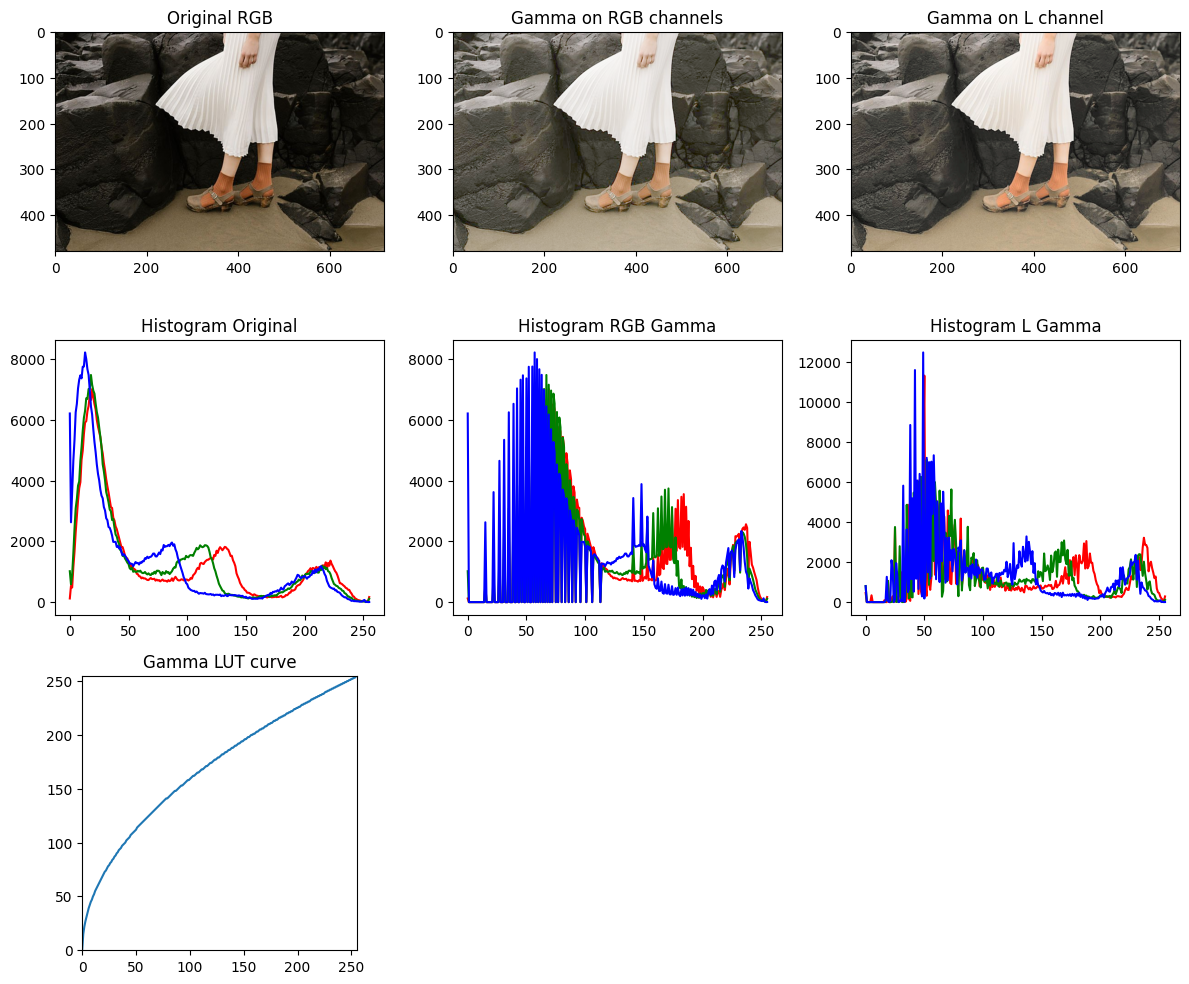

In [152]:
q3_img_rgb = cv.cvtColor(q3_img, cv.COLOR_BGR2RGB)

# --- Gamma correction in RGB space (your original way) ---
img_gamma_rgb = cv.LUT(q3_img, table)
img_gamma_rgb = cv.cvtColor(img_gamma_rgb, cv.COLOR_BGR2RGB)

# --- Gamma correction in LAB space (only L channel) ---
lab = cv.cvtColor(q3_img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

# apply gamma correction only to L channel
l_gamma = cv.LUT(L, table)

lab_gamma = cv.merge([l_gamma, a, b])
img_gamma_lab = cv.cvtColor(lab_gamma, cv.COLOR_LAB2RGB)

# --- Plot results ---
f, axarr = plt.subplots(3,3, figsize=(12,10))

# Original
axarr[0,0].imshow(q3_img_rgb)
axarr[0,0].set_title("Original RGB")

# Gamma (RGB space)
axarr[0,1].imshow(img_gamma_rgb)
axarr[0,1].set_title("Gamma on RGB channels")

# Gamma (LAB space, L only)
axarr[0,2].imshow(img_gamma_lab)
axarr[0,2].set_title("Gamma on L channel")

# Histograms
color = ('r','g','b')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([q3_img_rgb],[i],None,[256],[0,256])
    axarr[1,0].plot(hist_orig, color=c)
    hist_rgb = cv.calcHist([img_gamma_rgb],[i],None,[256],[0,256])
    axarr[1,1].plot(hist_rgb, color=c)
    hist_lab = cv.calcHist([img_gamma_lab],[i],None,[256],[0,256])
    axarr[1,2].plot(hist_lab, color=c)

axarr[1,0].set_title("Histogram Original")
axarr[1,1].set_title("Histogram RGB Gamma")
axarr[1,2].set_title("Histogram L Gamma")

# LUT mapping curve
axarr[2,0].plot(table)
axarr[2,0].set_xlim(0,255)
axarr[2,0].set_ylim(0,255)
axarr[2,0].set_aspect('equal')
axarr[2,0].set_title("Gamma LUT curve")

# Hide empty subplots
axarr[2,1].axis('off')
axarr[2,2].axis('off')

plt.tight_layout()
plt.show()